In [2]:
import numpy as np
from math import pi
import tensorflow as tf
import matplotlib.pyplot as plt

# 分段常数衰减(Piecewise Constant Decay)

每经过$T_1, T_2, ... ,T_m$倍，学习率就下降**原来的**为$\beta_1, \beta_2, ... ,\beta_m$倍

## 调包实现

In [3]:
boundaries=[20, 40, 60, 80]
values=[1, 0.5, 0.25, 0.125, 0.0625]
piece_wise_constant_decay = tf.keras.optimizers.schedules.PiecewiseConstantDecay(
                            boundaries=boundaries, values=values, name=None)

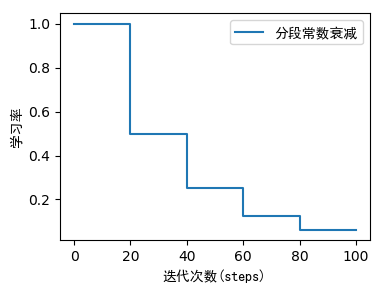

In [67]:
plt.figure(dpi=100, figsize=(4, 3))
plt.ylabel('学习率', fontdict={'family':'SimHei'})
plt.xlabel('迭代次数(steps)', fontdict={'family':'SimHei'})
plt.step(range(0, 101, 20), [1, 0.5, 0.25, 0.125, 0.0625, 0.0625], where='post',
         label=r'分段常数衰减')
plt.legend(prop={'family':'SimHei'})
plt.savefig('分段常数衰减.png', bbox_inches='tight')

## 自定义实现

In [5]:
class PiecewiseConstantDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, boundaries, values):
        super().__init__()
        self.boundaries = tf.cast(boundaries, dtype=tf.float32)
        self.values = tf.cast(values, dtype=tf.float32)
    
    def __call__(self, step):
        for i in range(len(self.boundaries)):
            if self.boundaries[i] >= step:
                return self.values[i]
        else:
            return self.values[-1]

In [6]:
my_piece_wise_constant_decay = PiecewiseConstantDecay(boundaries, values)
my_piece_wise_constant_decay(85)

<tf.Tensor: shape=(), dtype=float32, numpy=0.0625>

# 逆时衰减(Inverse Time Decay)

$$\alpha_{t}=\alpha_{0} \frac{1}{1+\beta \times \frac{t}{T}}$$

经过$kT$个step后，学习率就下降为**原来的**$\frac{1}{1+k\beta}$倍

## 调包实现

In [31]:
inverse_time_decay = tf.keras.optimizers.schedules.InverseTimeDecay(
                     initial_learning_rate=1., decay_steps=1, decay_rate=0.1, staircase=False, name=None)

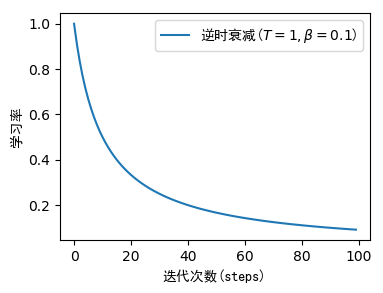

In [66]:
plt.figure(dpi=100, figsize=(4, 3))
plt.ylabel('学习率', fontdict={'family':'SimHei'})
plt.xlabel('迭代次数(steps)', fontdict={'family':'SimHei'})
plt.plot(inverse_time_decay(tf.range(100, dtype=tf.float32)),
         label=r'逆时衰减($T=1, \beta=0.1$)')
plt.legend(prop={'family':'SimHei'})
plt.savefig('逆时衰减.png', bbox_inches='tight')

## 自定义实现

In [8]:
class InverseTimeDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, decay_steps, decay_rate):
        super().__init__()
        self.initial_learning_rate = tf.convert_to_tensor(initial_learning_rate)
        self.decay_steps = tf.cast(decay_steps, dtype=tf.float32)
        self.decay_rate = tf.convert_to_tensor(decay_rate)
    
    def __call__(self, step):
        step = tf.convert_to_tensor(step)
        return self.initial_learning_rate / (1 + self.decay_rate * step / self.decay_steps)

In [9]:
my_inverse_time_decay = InverseTimeDecay(1., 1, 0.1)

# 指数衰减(Exponential Decay)

$$
\alpha_{t}=\alpha_{0}\beta^{\frac{t}{T}}
$$

$\beta$: 衰减率

迭代T个step后，学习率降为原来的 $\beta$倍

## 调包实现

In [35]:
exponential_decay = tf.keras.optimizers.schedules.ExponentialDecay(
                        initial_learning_rate=1., decay_steps=1, decay_rate=0.96, staircase=False, name=None
                    )

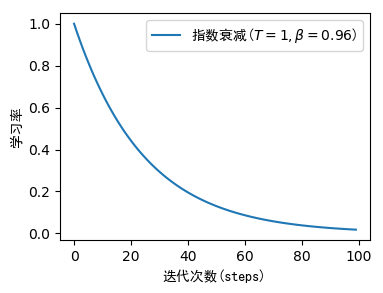

In [65]:
plt.figure(dpi=100, figsize=(4, 3))
plt.ylabel('学习率', fontdict={'family':'SimHei'})
plt.xlabel('迭代次数(steps)', fontdict={'family':'SimHei'})
plt.plot(exponential_decay(tf.range(100, dtype=tf.float32)),
         label=r'指数衰减($T=1, \beta=0.96$)')
plt.legend(prop={'family':'SimHei'})
plt.savefig('指数衰减.png', bbox_inches='tight')

## 自定义实现

In [11]:
class ExponentialDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, decay_steps, decay_rate):
        super().__init__()
        self.initial_learning_rate = tf.cast(initial_learning_rate, dtype=tf.float32)
        self.decay_steps = tf.cast(decay_steps, dtype=tf.float32)
        self.decay_rate = tf.cast(decay_rate, dtype=tf.float32)
        
    def __call__(self, step):
        return self.initial_learning_rate * self.decay_rate ** (step / self.decay_steps)

In [12]:
my_exponential_decay = ExponentialDecay(1, 1000, 0.04)

# 自然指数衰减(Natural Exponential Decay)

$$
\alpha_{t}=\alpha_{0} \exp (-\beta \times \frac{t}{T})
$$

$\beta$: 衰减率

迭代T个step后，学习率降为原来的 $\exp{(-\beta)}$倍

## 自定义实现

In [13]:
class NaturalExpDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, decay_steps, decay_rate):
        super().__init__()
        self.initial_learning_rate = tf.cast(initial_learning_rate, dtype=tf.float32)
        self.decay_steps = tf.cast(decay_steps, dtype=tf.float32)
        self.decay_rate = tf.cast(decay_rate, dtype=tf.float32)
        
    def __call__(self, step):
        return self.initial_learning_rate * tf.math.exp(-self.decay_rate * (step / self.decay_steps))

In [37]:
natural_exp_decay = NaturalExpDecay(1, 1, 0.05)

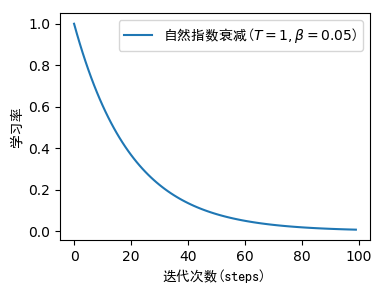

In [64]:
plt.figure(dpi=100, figsize=(4, 3))
plt.ylabel('学习率', fontdict={'family':'SimHei'})
plt.xlabel('迭代次数(steps)', fontdict={'family':'SimHei'})
plt.plot(natural_exp_decay(tf.range(100, dtype=tf.float32)),
         label=r'自然指数衰减($T=1, \beta=0.05$)')
plt.legend(prop={'family':'SimHei'})
plt.savefig('自然指数衰减.png', bbox_inches='tight')

# 余弦衰减(Cosine Decay)
$$
\alpha_{t}=\frac{1}{2} \alpha_{0}\left(1+\cos \left(\frac{t \pi}{T}\right)\right)
$$


$T$为总迭代次数

$\alpha_{0}$ 初始学习率

$\alpha_{t}$ 第$t$轮的学习率

迭代T个step后学习率降至0

## 调包实现

In [15]:
cosine_decay = tf.keras.experimental.CosineDecay(
                initial_learning_rate=1., decay_steps=100, alpha=0.0, name=None)

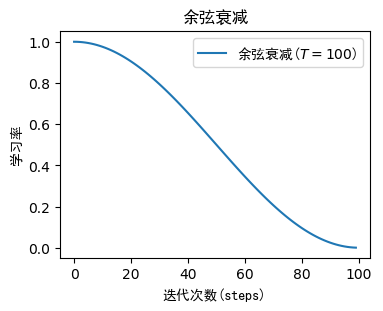

In [63]:
plt.figure(dpi=100, figsize=(4, 3))
plt.ylabel('学习率', fontdict={'family':'SimHei'})
plt.xlabel('迭代次数(steps)', fontdict={'family':'SimHei'})
plt.plot(cosine_decay(tf.range(100, dtype=tf.float32)),
         label=r'余弦衰减($T=100$)')
plt.legend(prop={'family':'SimHei'})
plt.title('余弦衰减', fontdict={'family':'SimHei'})
plt.savefig('余弦衰减.png', bbox_inches='tight')

## 自定义实现

In [17]:
class CosineDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, initial_learning_rate, decay_steps):
        super().__init__()
        self.initial_learning_rate = tf.cast(initial_learning_rate, dtype=tf.float32)
        self.decay_steps = tf.cast(decay_steps, dtype=tf.float32)
    
    def __call__(self, step):
        return self.initial_learning_rate * (1 + tf.math.cos(step * pi / self.decay_steps)) / 2
my_cosine_decay = CosineDecay(1., 100)

# 绘图

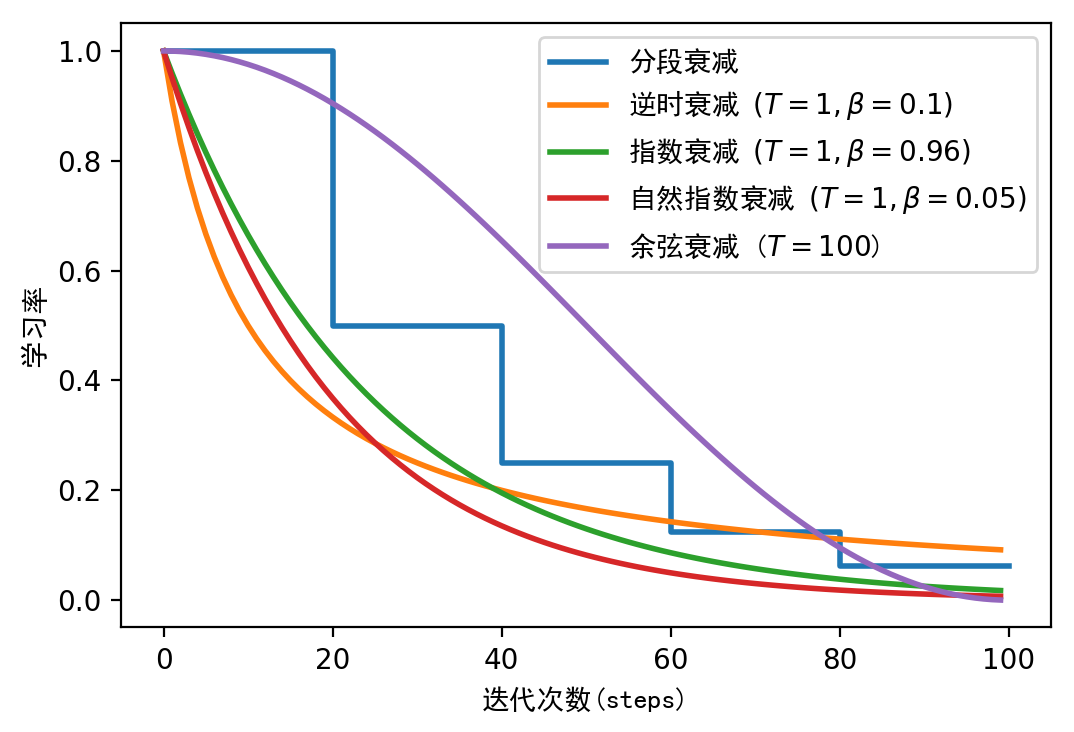

In [68]:
fig, ax = plt.subplots(dpi=200, figsize=(6,4))
# 分段衰减
ax.step(range(0, 101, 20), [1, 0.5, 0.25, 0.125, 0.0625, 0.0625], where='post', lw=2,
        label='分段衰减')

# 逆时衰减
ax.plot(inverse_time_decay(tf.range(100, dtype=tf.float32)), lw=2,
        label=r'逆时衰减 $(T=1, \beta=0.1)$')

# 指数衰减
ax.plot(exponential_decay(tf.range(100, dtype=tf.float32)), lw=2,
        label=r'指数衰减 $(T=1, \beta=0.96)$')

# 自然指数衰减
ax.plot(natural_exp_decay(tf.range(100, dtype=tf.float32)), lw=2,
        label=r'自然指数衰减 $(T=1, \beta=0.05)$')

# 余弦衰减
ax.plot(cosine_decay(tf.range(100, dtype=tf.float32)), lw=2,
        label=r'余弦衰减 ($T=100$)')
ax.legend(prop={'family':'SimHei'})
ax.set_ylabel('学习率', fontdict={'family':'SimHei'})
ax.set_xlabel('迭代次数(steps)', fontdict={'family':'SimHei'})

plt.savefig('学习率衰减曲线.png', bbox_inches='tight')
plt.show()